In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# project directory
current_dir = 'Home Credit_Kaggle'

# set the project folder as current working directory
import os
complete_path = os.path.join('/content/drive/My Drive/Colab Notebooks/',current_dir)
os.chdir(complete_path)

In [ ]:
import numpy as np
import pandas as pd

#Check distribution of number of records in files for each application

As we know, all files are linked with each other through keys. One APPLICATION_TRAIN.SK_ID_CURR = one xi or one datapoint. Each xi can have more than one row of data in other files. 

Here we are trying to find the distribution of number of rows in each file 
1. corresponding to an xi (SK_ID_CURR) or 
2. corresponding to multiple keys if the file has two set of keys (xi + SK_ID_PREV) or 
3. corresponding to a different key (a special case of Bureau Balance file) if the file has a separate key (SK_ID_BUREAU)

The above information will help us in deciding the number of rows in File Snapshot i.e. width of File Snapshot that we will create later.

In [ ]:
# load application_train.csv
app_train = pd.read_csv('data/application_train.csv')
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


##Bureau.csv

(1716428, 17)
Mean number of records:  5.612708502964249
Median number of records:  4.0


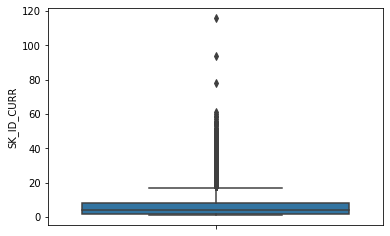

In [ ]:
# load bureau.csv
bureau = pd.read_csv('data/bureau.csv')
print(bureau.shape)
bureau.head()

# find the count of records for each value of SK_ID_CURR
bureau_sk_id_counts = bureau['SK_ID_CURR'].value_counts()

# plot the above distribution in box plot
import seaborn as sns
import matplotlib.pyplot as plt

print("Mean number of records: ", np.mean(bureau_sk_id_counts))
print("Median number of records: ", np.median(bureau_sk_id_counts))
sns.boxplot(y = bureau_sk_id_counts)
plt.show()

##Bureau Balance.csv

(27299925, 3)
Mean number of records:  33.39869341016277
Median number of records:  26.0


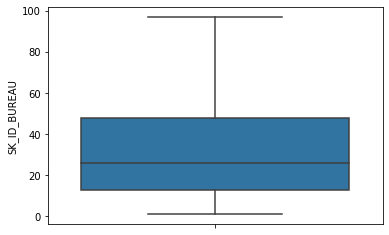

In [ ]:
# load bureau balance.csv
bureau_bal = pd.read_csv('data/bureau_balance.csv')
print(bureau_bal.shape)
bureau_bal.head()

# find the count of records for each value of SK_ID_BUREAU
bureau_bal_sk_id_bur_counts = bureau_bal['SK_ID_BUREAU'].value_counts()

# plot the above distribution in box plot
import seaborn as sns
import matplotlib.pyplot as plt

print("Mean number of records: ", np.mean(bureau_bal_sk_id_bur_counts))
print("Median number of records: ", np.median(bureau_bal_sk_id_bur_counts))
sns.boxplot(y = bureau_bal_sk_id_bur_counts)
plt.show()

##Previous Application.csv

(1670214, 37)
Mean number of records:  4.928964135313716
Median number of records:  4.0


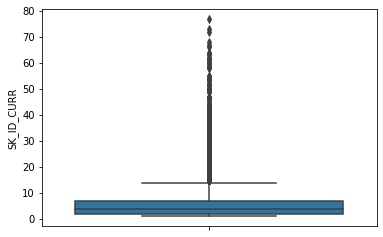

In [ ]:
# load previous_application.csv
previous_app = pd.read_csv('data/previous_application.csv')
print(previous_app.shape)
previous_app.head()

# find the count of records for each value of SK_ID_CURR
previous_app_sk_id_curr_counts = previous_app['SK_ID_CURR'].value_counts()

# plot the above distribution in box plot
import seaborn as sns
import matplotlib.pyplot as plt

print("Mean number of records: ", np.mean(previous_app_sk_id_curr_counts))
print("Median number of records: ", np.median(previous_app_sk_id_curr_counts))
sns.boxplot(y = previous_app_sk_id_curr_counts)
plt.show()

##POS Cash Balance.csv

(10001358, 8)
Mean number of records:  10.68150268336315
Median number of records:  10.0


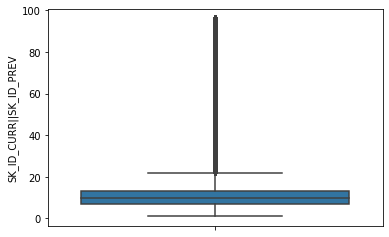

In [ ]:
# load POS_CASH_balance.csv
pos_cash_bal = pd.read_csv('data/POS_CASH_balance.csv')
print(pos_cash_bal.shape)
pos_cash_bal.head()

# find the count of records for each value of SK_ID_CURR and SK_ID_PREV

# to do so we need a column that has sk_id_curr + sk_id_prev
# so that we can find a count for combination of both
# create a new column with sK_id_curr + sk_id_prev
sk_id_curr = np.asarray(pos_cash_bal['SK_ID_CURR'])
sk_id_prev = np.asarray(pos_cash_bal['SK_ID_PREV'])

sk_id_curr_prev = []
for i in range(len(sk_id_curr)):
  id_curr_prev_concat = str(sk_id_curr[i]) + str(sk_id_prev[i])
  sk_id_curr_prev.append(id_curr_prev_concat)

pos_cash_bal['SK_ID_CURR||SK_ID_PREV'] = sk_id_curr_prev
pos_cash_bal['SK_ID_CURR||SK_ID_PREV'].head()

pos_cash_bal_sk_id_curr_prev_counts = pos_cash_bal['SK_ID_CURR||SK_ID_PREV'].value_counts()

# plot the above distribution in box plot
import seaborn as sns
import matplotlib.pyplot as plt

print("Mean number of records: ", np.mean(pos_cash_bal_sk_id_curr_prev_counts))
print("Median number of records: ", np.median(pos_cash_bal_sk_id_curr_prev_counts))
sns.boxplot(y = pos_cash_bal_sk_id_curr_prev_counts)
plt.show()

##Installments Payments.csv

(13605401, 8)
Mean number of records:  13.636054851305735
Median number of records:  10.0


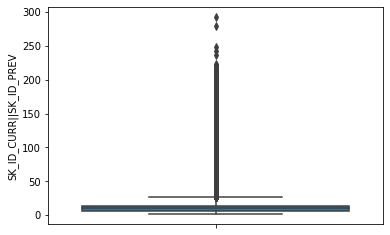

In [ ]:
# load installments_payments.csv
instalm_payments = pd.read_csv('data/installments_payments.csv')
print(instalm_payments.shape)
instalm_payments.head()

# find the count of records for each value of SK_ID_CURR and SK_ID_PREV

# to do so we need a column that has sk_id_curr + sk_id_prev
# so that we can find a count for combination of both
# create a new column with sK_id_curr + sk_id_prev
sk_id_curr = np.asarray(instalm_payments['SK_ID_CURR'])
sk_id_prev = np.asarray(instalm_payments['SK_ID_PREV'])

sk_id_curr_prev = []
for i in range(len(sk_id_curr)):
  id_curr_prev_concat = str(sk_id_curr[i]) + str(sk_id_prev[i])
  sk_id_curr_prev.append(id_curr_prev_concat)

instalm_payments['SK_ID_CURR||SK_ID_PREV'] = sk_id_curr_prev
instalm_payments['SK_ID_CURR||SK_ID_PREV'].head()

instalm_payments_sk_id_curr_prev_counts = instalm_payments['SK_ID_CURR||SK_ID_PREV'].value_counts()

# plot the above distribution in box plot
import seaborn as sns
import matplotlib.pyplot as plt

print("Mean number of records: ", np.mean(instalm_payments_sk_id_curr_prev_counts))
print("Median number of records: ", np.median(instalm_payments_sk_id_curr_prev_counts))
sns.boxplot(y = instalm_payments_sk_id_curr_prev_counts)
plt.show()

##Credit Card Balance.csv

(3840312, 23)
Mean number of records:  36.81739480571774
Median number of records:  21.0


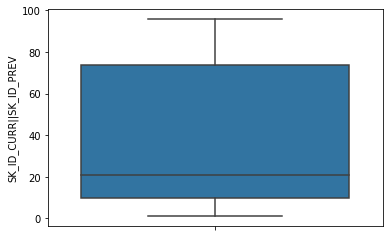

In [ ]:
# load credit_card_balance.csv
credit_card_bal = pd.read_csv('data/credit_card_balance.csv')
print(credit_card_bal.shape)
credit_card_bal.head()

# find the count of records for each value of SK_ID_CURR and SK_ID_PREV

# to do so we need a column that has sk_id_curr + sk_id_prev
# so that we can find a count for combination of both
# create a new column with sK_id_curr + sk_id_prev
sk_id_curr = np.asarray(credit_card_bal['SK_ID_CURR'])
sk_id_prev = np.asarray(credit_card_bal['SK_ID_PREV'])

sk_id_curr_prev = []
for i in range(len(sk_id_curr)):
  id_curr_prev_concat = str(sk_id_curr[i]) + str(sk_id_prev[i])
  sk_id_curr_prev.append(id_curr_prev_concat)

credit_card_bal['SK_ID_CURR||SK_ID_PREV'] = sk_id_curr_prev
credit_card_bal['SK_ID_CURR||SK_ID_PREV'].head()

credit_card_bal_sk_id_curr_prev_counts = credit_card_bal['SK_ID_CURR||SK_ID_PREV'].value_counts()

# plot the above distribution in box plot
import seaborn as sns
import matplotlib.pyplot as plt

print("Mean number of records: ", np.mean(credit_card_bal_sk_id_curr_prev_counts))
print("Median number of records: ", np.median(credit_card_bal_sk_id_curr_prev_counts))
sns.boxplot(y = credit_card_bal_sk_id_curr_prev_counts)
plt.show()